In [19]:
import math
import matplotlib.pyplot as plt

class Robot:
    def __init__(self, name):
        self.name = name
        self.x = 0
        self.y = 0
        self.direction = 0
        self.speed = 0
        self.dt = 0.01
        self.history = [(self.x, self.y)]
        self.angular_speed = 0

    def get_position(self):
        return self.x, self.y
    
    def get_direction(self):
        return self.direction

    def get_speed(self):
        return self.speed
    
    def get_angular_speed(self):
        return self.angular_speed

    def set_angular_speed(self, new_angular_speed):
        self.angular_speed = max(new_angular_speed, 180)
        self.angular_speed = min(new_angular_speed, -180)
        self.angular_speed = max(-180, min(new_angular_speed, 180))
    
    def set_direction(self, new_direction):
        self.direction = new_direction % 360
        self.direction = self.direction % 360
    
    def set_speed(self, new_speed):
        speed = min(new_speed, 100) 
        speed = max(speed, 0)
        self.speed = max(0, min(new_speed, 100))

    def move_forward(self, distance):
        self.x += distance * math.sin(math.radians(self.direction))
        self.y += distance * math.cos(math.radians(self.direction))
        self.history.append((self.x, self.y))

    def turn(self, angle):
        self.direction += angle

    def draw_square(self, side_length):
        for i in range(4):
            self.move_forward(side_length)
            self.turn(90)
        self.move_forward(side_length)
        self.move_forward(-side_length)
        self.turn(-360)
    
    def update(self):
        ma = self.angular_speed * self.dt
        self.turn(ma)
        md = self.speed * self.dt
        self.move_forward(md)
        
    
    def move_in_circle(self, radius, period):
        self.speed = (2 * math.pi * radius)
        self.angular_speed = 360 / period
        self.simulate(period)
    

    def simulate(self, duration):
        n = int(1 / self.dt * duration)
        for i in range(n):
            self.update()
    
    def draw_path(self):
        if len(self.history) < 2:
            return "#ERROR Not enough points"
        else:
            x_coords = [pos[0] for pos in self.history]
            y_coords = [pos[1] for pos in self.history]
            plt.figure(figsize=(3, 3))
            plt.plot(x_coords, y_coords, 'b-o')
            plt.grid(True)
            plt.axis('equal')
            plt.title("Advanced robots and their paths")
            plt.xlabel("X coord")
            plt.ylabel("Y coord")
            
            plt.scatter(self.history[0][0], self.history[0][1], 
                   color="green", 
                   s=400, 
                   alpha=0.5,
                   label="Start")
            plt.scatter(self.history[-1][0], self.history[-1][1], 
                   color="red", 
                   s=200, 
                   alpha=0.5,
                   label="Finish")
            plt.legend()
            plt.show()
    
    def draw_ngon(self, quantity=6, length=10):
        ma = 360 / quantity
        t1 = length / self.speed
        t2 = ma / self.angular_speed
        s1 = self.speed
        s2 = self.angular_speed
        for i in range(quantity):
            self.speed = s1
            self.angular_speed = 0
            self.simulate(t1)
            self.angular_speed = s2
            self.speed = 0
            self.simulate(t2)
    
    def draw_rounded_polygon(self, quantity=6, length=6, radius=2):
        ma = 360 / quantity
        t1 = length / self.speed
        t2 = ma / self.angular_speed
        s1 = self.speed
        s2 = self.angular_speed
        l = 2 * math.pi * radius / quantity
        v1 = l / t2
        for i in range(quantity):
            self.speed = s1
            self.angular_speed = 0
            self.simulate(t1)
            self.angular_speed = s2
            self.speed = v1
            self.simulate(t2)

    def info(self):
        return f"{self.name}: position ({self.x}, {self.y}), direction {self.direction}°, speed {self.speed}"


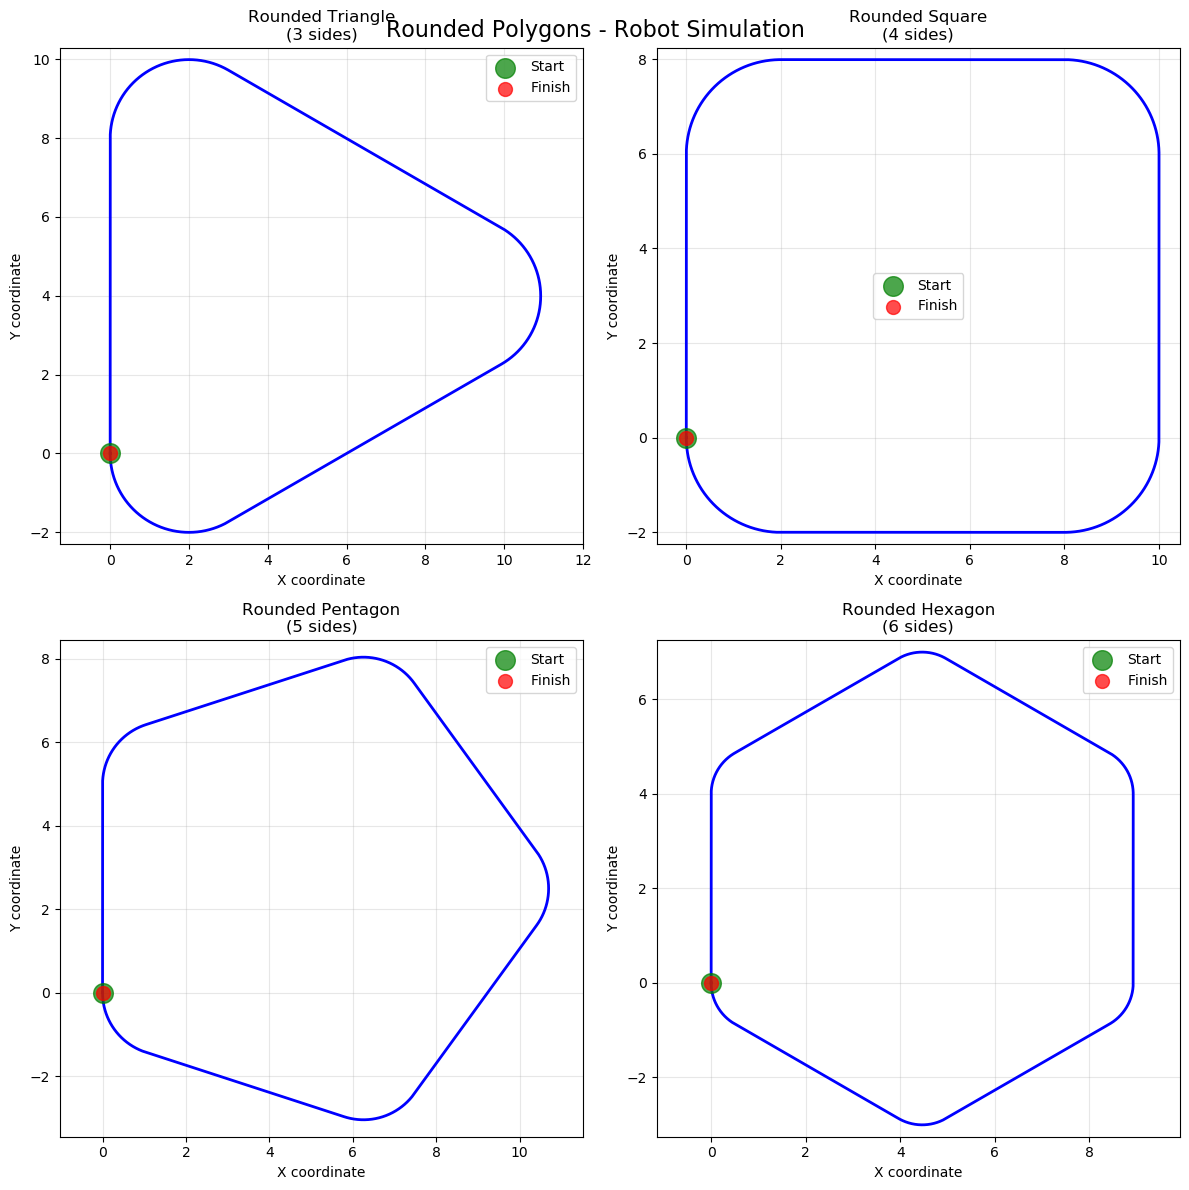

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle("Rounded Polygons - Robot Simulation", fontsize=16)

shapes = [
    ("Rounded Triangle", 3, 8, 2),
    ("Rounded Square", 4, 6, 2), 
    ("Rounded Pentagon", 5, 5, 1.5),
    ("Rounded Hexagon", 6, 4, 1)
]

for i, (shape_name, sides, length, radius) in enumerate(shapes):
    row = i // 2
    col = i % 2

    robot = Robot(f"Robot_{shape_name}")
    robot.speed = 2
    robot.angular_speed = 30

    robot.draw_rounded_polygon(quantity=sides, length=length, radius=radius)

    ax = axes[row, col]
    x_coords = [pos[0] for pos in robot.history]
    y_coords = [pos[1] for pos in robot.history]

    ax.plot(x_coords, y_coords, 'b-', linewidth=2)
    ax.scatter(robot.history[0][0], robot.history[0][1], color="green", s=200, alpha=0.7, label="Start", zorder=3)
    ax.scatter(robot.history[-1][0], robot.history[-1][1], color="red", s=100, alpha=0.7, label="Finish", zorder=3)

    ax.set_title(f"{shape_name}\n({sides} sides)")
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.axis('equal')
    ax.set_xlabel("X coordinate")
    ax.set_ylabel("Y coordinate")

plt.tight_layout()
plt.show()